## Preporcesamiento de los Datos

In [3]:
import pandas as pd

# Cargar el conjunto de datos CSV en un DataFrame
ruta_archivo = r"D:\DATOS RECUPERADOS\UNIVERSIDAD DE LIMA\10. Decimo Ciclo\Seminario 1\BankSim.csv"
Modelo_Base = pd.read_csv(ruta_archivo)

# Muestra las primeras 10 filas del DataFrame Modelo_Base
print(Modelo_Base.head(10))
Modelo_Autoencoders= Modelo_Base 


   step       customer  age gender zipcodeOri       merchant zipMerchant  \
0     0  'C1093826151'  '4'    'M'    '28007'   'M348934600'     '28007'   
1     0   'C352968107'  '2'    'M'    '28007'   'M348934600'     '28007'   
2     0  'C2054744914'  '4'    'F'    '28007'  'M1823072687'     '28007'   
3     0  'C1760612790'  '3'    'M'    '28007'   'M348934600'     '28007'   
4     0   'C757503768'  '5'    'M'    '28007'   'M348934600'     '28007'   
5     0  'C1315400589'  '3'    'F'    '28007'   'M348934600'     '28007'   
6     0   'C765155274'  '1'    'F'    '28007'   'M348934600'     '28007'   
7     0   'C202531238'  '4'    'F'    '28007'   'M348934600'     '28007'   
8     0   'C105845174'  '3'    'M'    '28007'   'M348934600'     '28007'   
9     0    'C39858251'  '5'    'F'    '28007'   'M348934600'     '28007'   

              category  amount  fraud  
0  'es_transportation'    4.55      0  
1  'es_transportation'   39.68      0  
2  'es_transportation'   26.89      0  
3  

### Limpieza de Data

In [4]:
print("Unique zipCodeOri values: ",Modelo_Base.zipcodeOri.nunique())
print("Unique zipMerchant values: ",Modelo_Base.zipMerchant.nunique())
# dropping zipcodeori and zipMerchant since they have only one unique value
data_reduced = Modelo_Base.drop(['zipcodeOri','zipMerchant'],axis=1)
data_reduced.columns

# turning object columns type to categorical for easing the transformation process
col_categorical = data_reduced.select_dtypes(include= ['object']).columns
for col in col_categorical:
    data_reduced[col] = data_reduced[col].astype('category')
# categorical values ==> numeric values
data_reduced[col_categorical] = data_reduced[col_categorical].apply(lambda x: x.cat.codes)
data_reduced.head(5)

X = data_reduced.drop(['fraud'],axis=1)
y = Modelo_Base['fraud']
print(X.head(),"\n")
print(y.head())

data_reduced["category"].nunique

y[y==1].count()

Unique zipCodeOri values:  1
Unique zipMerchant values:  1
   step  customer  age  gender  merchant  category  amount
0     0       210    4       2        30        12    4.55
1     0      2753    2       2        30        12   39.68
2     0      2285    4       1        18        12   26.89
3     0      1650    3       2        30        12   17.25
4     0      3585    5       2        30        12   35.72 

0    0
1    0
2    0
3    0
4    0
Name: fraud, dtype: int64


7200

In [12]:
data_reduced

,step,customer,age,gender,merchant,category,amount,fraud
0,0,210,4,2,30,12,4.55,0
1,0,2753,2,2,30,12,39.68,0
2,0,2285,4,1,18,12,26.89,0
3,0,1650,3,2,30,12,17.25,0
4,0,3585,5,2,30,12,35.72,0
...,...,...,...,...,...,...,...,...
594638,179,1639,3,1,18,12,20.53,0
594639,179,3369,4,1,18,12,50.73,0
594640,179,529,2,1,31,2,22.44,0
594641,179,1083,5,2,18,12,14.46,0


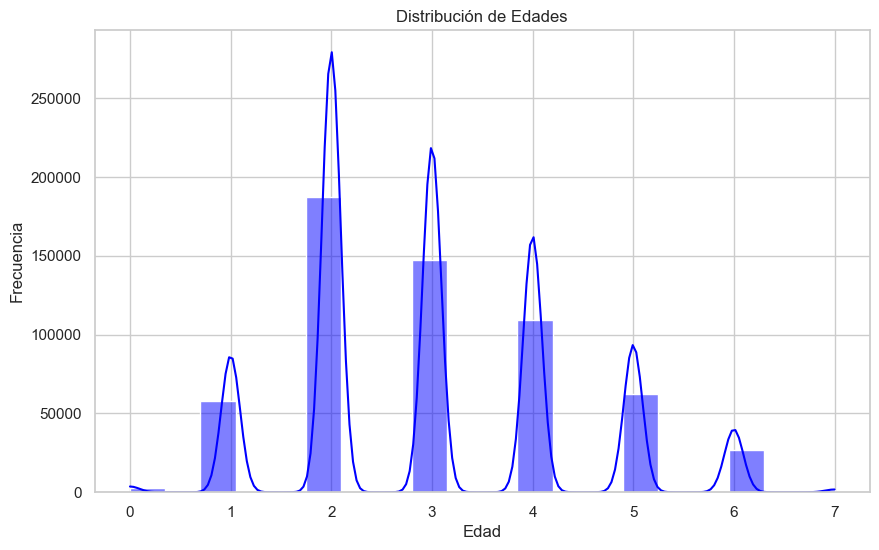

C:\Users\Alexander Cruz\AppData\Local\Temp\ipykernel_19564\317392036.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_reduced, x='gender', palette='viridis')


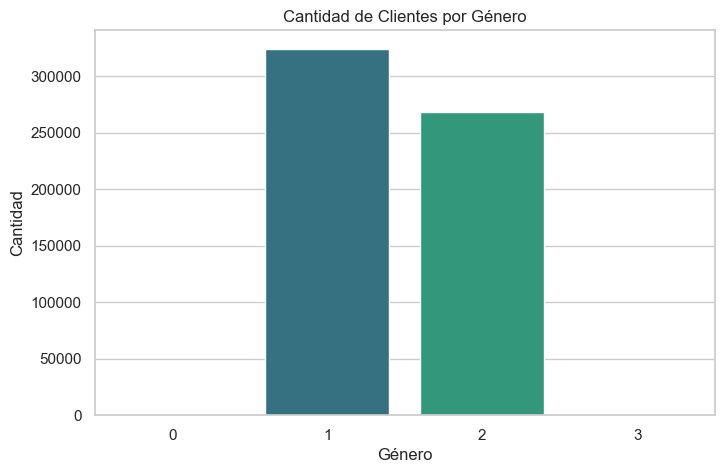

C:\Users\Alexander Cruz\AppData\Local\Temp\ipykernel_19564\317392036.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_reduced, y='category', palette='magma')


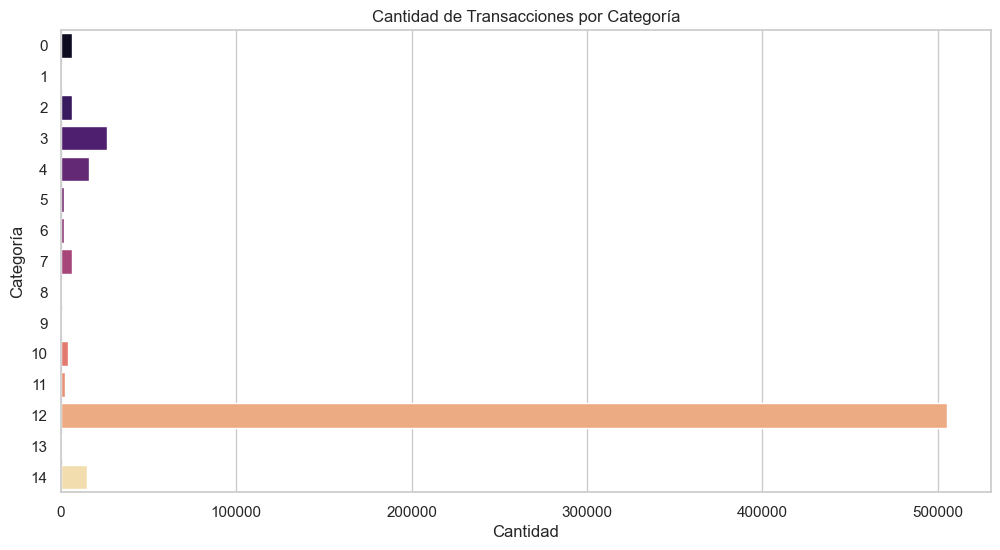

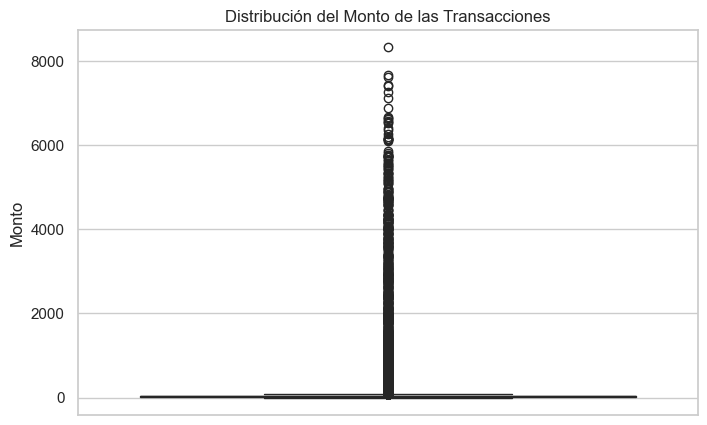

C:\Users\Alexander Cruz\AppData\Local\Temp\ipykernel_19564\317392036.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_reduced, x='fraud', palette='rocket')


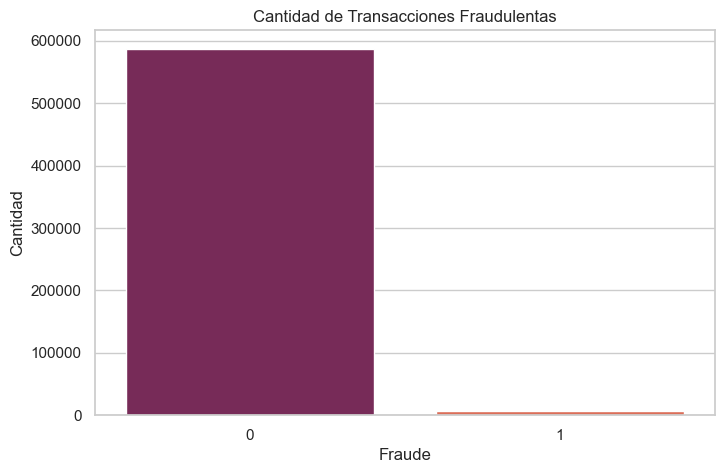

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir el estilo de los gráficos
sns.set(style="whitegrid")

# Visualización de histograma para la variable 'age'
plt.figure(figsize=(10, 6))
sns.histplot(data_reduced['age'], bins=20, kde=True, color='blue')
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Visualización de un gráfico de barras para la variable 'gender'
plt.figure(figsize=(8, 5))
sns.countplot(data=data_reduced, x='gender', palette='viridis')
plt.title('Cantidad de Clientes por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()

# Visualización de un gráfico de barras para la variable 'category'
plt.figure(figsize=(12, 6))
sns.countplot(data=data_reduced, y='category', palette='magma')
plt.title('Cantidad de Transacciones por Categoría')
plt.xlabel('Cantidad')
plt.ylabel('Categoría')
plt.show()

# Visualización de un diagrama de caja para la variable 'amount'
plt.figure(figsize=(8, 5))
sns.boxplot(data=data_reduced, y='amount', color='green')
plt.title('Distribución del Monto de las Transacciones')
plt.ylabel('Monto')
plt.show()

# Visualización de un gráfico de barras para la variable 'fraud'
plt.figure(figsize=(8, 5))
sns.countplot(data=data_reduced, x='fraud', palette='rocket')
plt.title('Cantidad de Transacciones Fraudulentas')
plt.xlabel('Fraude')
plt.ylabel('Cantidad')
plt.show()


### Standar Scaler

In [4]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Separar la variable objetivo 'fraud'
# Separar la variable objetivo 'fraud'
target = data_reduced['fraud']
features =data_reduced.drop(columns=['fraud'])

# Aplicar MinMaxScaler a las características
scaler = MinMaxScaler()
features_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# Reintegrar la variable objetivo
Modelo_Base_scaled = pd.concat([features_scaled, target.reset_index(drop=True)], axis=1)

Modelo_Base_scaled


,step,customer,age,gender,merchant,category,amount,fraud
0,0.0,0.051082,0.571429,0.666667,0.612245,0.857143,0.000546,0
1,0.0,0.669667,0.285714,0.666667,0.612245,0.857143,0.004764,0
2,0.0,0.555826,0.571429,0.333333,0.367347,0.857143,0.003228,0
3,0.0,0.401362,0.428571,0.666667,0.612245,0.857143,0.002071,0
4,0.0,0.872051,0.714286,0.666667,0.612245,0.857143,0.004288,0
...,...,...,...,...,...,...,...,...
594638,1.0,0.398686,0.428571,0.333333,0.367347,0.857143,0.002465,0
594639,1.0,0.819509,0.571429,0.333333,0.367347,0.857143,0.006090,0
594640,1.0,0.128679,0.285714,0.333333,0.632653,0.142857,0.002694,0
594641,1.0,0.263440,0.714286,0.666667,0.367347,0.857143,0.001736,0


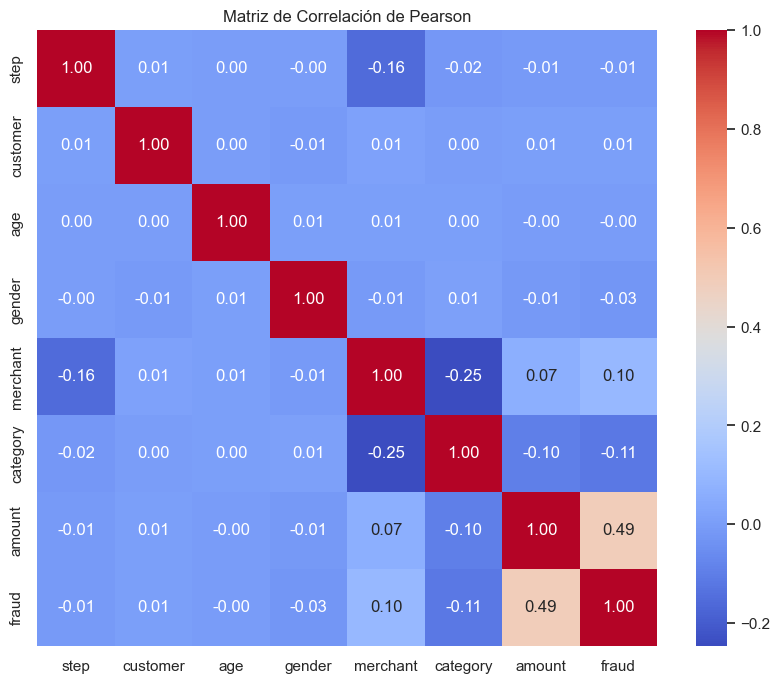

Variables más correlacionadas con 'fraud':
merchant    0.104532
category   -0.114272
amount      0.489967
Name: fraud, dtype: float64


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la matriz de correlación
Modelo_Base_Limpio= data_reduced

# Calcular la matriz de correlación de Pearson
correlation_matrix = Modelo_Base_Limpio.corr()

# Mostrar la gráfica de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Pearson')
plt.show()

# Identificar las variables más correlacionadas con 'fraud'
correlation_with_fraud = correlation_matrix['fraud'].drop('fraud')
most_correlated = correlation_with_fraud[abs(correlation_with_fraud) > 0.05]

print("Variables más correlacionadas con 'fraud':")
print(most_correlated)

In [56]:
Modelo_Base_scaled

,step,customer,age,gender,merchant,category,amount,fraud
0,0.0,0.623077,0.576513,0.826632,0.685438,1.000000,0.000546,0
1,0.0,0.630769,1.000000,0.826632,0.685438,1.000000,0.004764,0
2,0.0,0.230769,0.576513,1.000000,1.000000,1.000000,0.003228,0
3,0.0,0.638462,0.782649,0.826632,0.685438,1.000000,0.002071,0
4,0.0,0.538462,0.325601,0.826632,0.685438,1.000000,0.004288,0
...,...,...,...,...,...,...,...,...
593460,1.0,0.688462,0.782649,1.000000,1.000000,1.000000,0.002465,0
593461,1.0,0.642308,0.576513,1.000000,1.000000,1.000000,0.006090,0
593462,1.0,0.626923,1.000000,1.000000,0.009615,0.011802,0.002694,0
593463,1.0,0.615385,0.325601,0.826632,1.000000,1.000000,0.001736,0


In [78]:
# Calcula la matriz de correlación
correlation_matrix = data_reduced.corr()

# Imprime la matriz de correlación
print("Matriz de Correlación:")
print(correlation_matrix)

# Imprime los valores de correlación uno por uno
print("\nValores de Correlación:")
for columna1 in correlation_matrix.columns:
    for columna2 in correlation_matrix.columns:
        if columna1 != columna2:
            correlacion = correlation_matrix[columna1][columna2]
            print(f"Correlación entre {columna1} y {columna2}: {correlacion:.2f}")

# Interpreta los valores de correlación
print("\nInterpretación de los Valores de Correlación:")
print("- Un valor cercano a 1 indica una correlación positiva fuerte.")
print("- Un valor cercano a -1 indica una correlación negativa fuerte.")
print("- Un valor cercano a 0 indica una correlación débil o ausente.")

# Encuentra las correlaciones más altas y más bajas
max_corr = correlation_matrix.abs().unstack().sort_values(ascending=False)[len(correlation_matrix):]
min_corr = correlation_matrix.abs().unstack().sort_values(ascending=True)[0:len(correlation_matrix)-1]

print("\nCorrelaciones más altas:")
print(max_corr.head())
print("\nCorrelaciones más bajas:")
print(min_corr.head())


Matriz de Correlación:
              step  customer       age    gender  merchant  category  \
step      1.000000  0.005082  0.001169 -0.001107 -0.156195 -0.017269   
customer  0.005082  1.000000  0.001940 -0.007568  0.013341  0.000166   
age       0.001169  0.001940  1.000000  0.005020  0.006973  0.004816   
gender   -0.001107 -0.007568  0.005020  1.000000 -0.007494  0.007700   
merchant -0.156195  0.013341  0.006973 -0.007494  1.000000 -0.245433   
category -0.017269  0.000166  0.004816  0.007700 -0.245433  1.000000   
amount   -0.007961  0.005823 -0.003930 -0.012888  0.065795 -0.098738   
fraud    -0.011898  0.005236 -0.004315 -0.025047  0.104532 -0.114272   

            amount     fraud  
step     -0.007961 -0.011898  
customer  0.005823  0.005236  
age      -0.003930 -0.004315  
gender   -0.012888 -0.025047  
merchant  0.065795  0.104532  
category -0.098738 -0.114272  
amount    1.000000  0.489967  
fraud     0.489967  1.000000  

Valores de Correlación:
Correlación entre step y

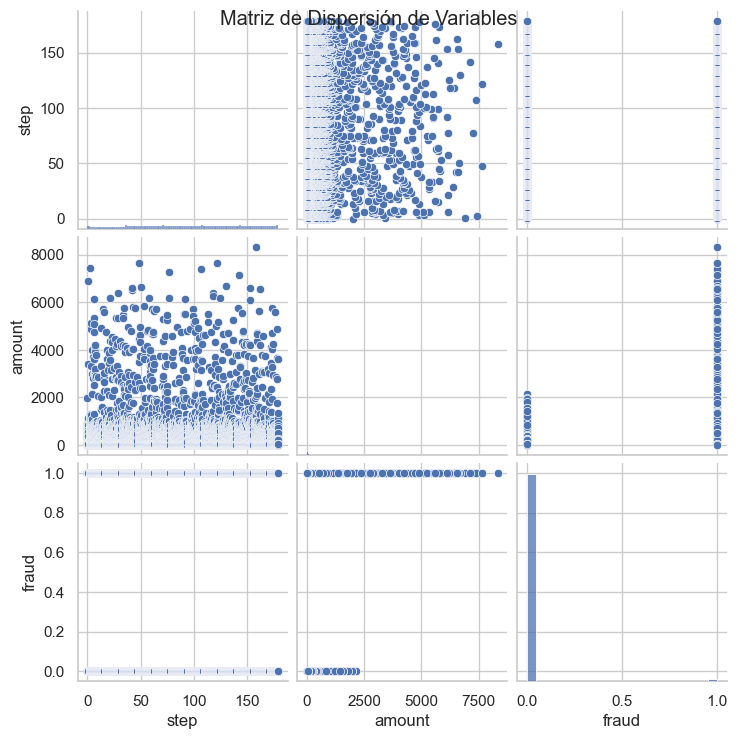

Matriz de Correlación de Pearson:
              step  customer       age    gender  merchant  category  \
step      1.000000  0.005082  0.001169 -0.001107 -0.156195 -0.017269   
customer  0.005082  1.000000  0.001940 -0.007568  0.013341  0.000166   
age       0.001169  0.001940  1.000000  0.005020  0.006973  0.004816   
gender   -0.001107 -0.007568  0.005020  1.000000 -0.007494  0.007700   
merchant -0.156195  0.013341  0.006973 -0.007494  1.000000 -0.245433   
category -0.017269  0.000166  0.004816  0.007700 -0.245433  1.000000   
amount   -0.007961  0.005823 -0.003930 -0.012888  0.065795 -0.098738   
fraud    -0.011898  0.005236 -0.004315 -0.025047  0.104532 -0.114272   

            amount     fraud  
step     -0.007961 -0.011898  
customer  0.005823  0.005236  
age      -0.003930 -0.004315  
gender   -0.012888 -0.025047  
merchant  0.065795  0.104532  
category -0.098738 -0.114272  
amount    1.000000  0.489967  
fraud     0.489967  1.000000  


In [79]:
# Calcular la correlación de Pearson
correlation_matrix = data_reduced.corr(method='pearson')

# Graficar la matriz de dispersión
sns.pairplot(Modelo_Base, kind='scatter')
plt.suptitle('Matriz de Dispersión de Variables')
plt.show()

# Imprimir la matriz de correlación de Pearson
print("Matriz de Correlación de Pearson:")
print(correlation_matrix)



## Ténicas de Balanceo de Datos

### Aplicación de SMOTE

In [16]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Separar las variables predictoras (X) y la variable objetivo (Y)
X = data_reduced.drop(columns=['fraud'])  # Excluimos la columna 'fraud'
y = data_reduced['fraud']

# Calcular la proporción deseada
minority_proportion = 0.4
# Obtener la cantidad de muestras en la clase mayoritaria
majority_count = y.value_counts().max()
# Calcular la cantidad de muestras objetivo para la clase minoritaria
target_minority_count = int(majority_count * minority_proportion)

# Definir la estrategia de sobremuestreo
sampling_strategy = {0: majority_count, 1: target_minority_count}

# Aplicar SMote para balancear las clases
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Crear un nuevo DataFrame con las variables balanceadas
Modelo_Limpio_Smote = pd.DataFrame(X_resampled, columns=X.columns)
Modelo_Limpio_Smote['fraud'] = y_resampled

# Mostrar la distribución de clases después de aplicar SMOTE
distribucion_clases = Modelo_Limpio_Smote['fraud'].value_counts()
print("Distribución de clases después de aplicar SMOTE:")
print(distribucion_clases)








Distribución de clases después de aplicar SMOTE:
fraud
0    587443
1    234977
Name: count, dtype: int64


### Aplicación de SMOTE-TOMEK

In [21]:
import pandas as pd
from imblearn.combine import SMOTETomek

# Hacer una copia del DataFrame Modelo_Base para crear Modelo_Limpio
# Modelo_Limpio = Modelo_Base_Limpio.copy()

# Eliminar filas con valores NaN en el DataFrame 'Modelo_Limpio'
# Modelo_Limpio = Modelo_Limpio.dropna()

# Separar las variables predictoras (X) y la variable objetivo (Y)
X = data_reduced.drop(columns=['fraud'])  # Excluimos la columna 'fraud'
Y = data_reduced['fraud']

# Calcular el número de muestras en la clase mayoritaria
majority_count = Y.value_counts().max()

# Calcular el número objetivo de muestras para la clase minoritaria
target_minority_count = int(majority_count * 0.4)

# Calcular el nuevo valor para sampling_strategy
sampling_strategy = {0: majority_count, 1: target_minority_count}

# Aplicar la técnica SMOTETomek con el nuevo valor de sampling_strategy
smote_tomek = SMOTETomek(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, Y_resampled = smote_tomek.fit_resample(X, Y)

# Crear un nuevo DataFrame con las variables balanceadas
Modelo_Limpio_SmoteTomek = pd.DataFrame(X_resampled, columns=X.columns)
Modelo_Limpio_SmoteTomek['fraud'] = Y_resampled

# Mostrar la distribución de clases después de aplicar SMOTETomek
distribucion_clases = Modelo_Limpio_SmoteTomek['fraud'].value_counts()
print("Distribución de clases después de aplicar SMOTETomek:")
print(distribucion_clases)





Distribución de clases después de aplicar SMOTETomek:
fraud
0    587122
1    234656
Name: count, dtype: int64


### Aplicación de SMOTE-ENN

In [22]:
import pandas as pd
from imblearn.combine import SMOTEENN


# Separar las variables predictoras (X) y la variable objetivo (Y)
X = data_reduced.drop(columns=['fraud'])  # Excluimos la columna 'fraud'
Y = data_reduced['fraud']

# Calcular el número de muestras en la clase mayoritaria
majority_count = Y.value_counts().max()

# Calcular el número objetivo de muestras para la clase minoritaria
target_minority_count = int(majority_count * 0.4)

# Calcular el nuevo valor para sampling_strategy
sampling_strategy = {0: majority_count, 1: target_minority_count}

# Aplicar la técnica SMOTE-ENN con el nuevo valor de sampling_strategy
smote_enn = SMOTEENN(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, Y_resampled = smote_enn.fit_resample(X, Y)

# Crear un nuevo DataFrame con las variables balanceadas
Modelo_Limpio_SMOTEENN = pd.DataFrame(X_resampled, columns=X.columns)
Modelo_Limpio_SMOTEENN['fraud'] = Y_resampled

# Mostrar la distribución de clases después de aplicar SMOTE-ENN
distribucion_clases = Modelo_Limpio_SMOTEENN['fraud'].value_counts()
print("Distribución de clases después de aplicar SMOTE-ENN:")
print(distribucion_clases)



Distribución de clases después de aplicar SMOTE-ENN:
fraud
0    571872
1    230062
Name: count, dtype: int64


### Aplicación de ROS

In [24]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

# Separar las variables predictoras (X) y la variable objetivo (Y)
X = data_reduced.drop(columns=['fraud'])  # Excluimos la columna 'fraud'
Y = data_reduced['fraud']

# Calcular el número de muestras en la clase mayoritaria
majority_count = Y.value_counts().max()

# Calcular el número objetivo de muestras para la clase minoritaria
target_minority_count = int(0.4 * majority_count)

# Calcular el nuevo valor para sampling_strategy
sampling_strategy = {0: majority_count, 1: target_minority_count}

# Aplicar la técnica Random Over Sampling (ROS) con el nuevo valor de sampling_strategy
ros = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, Y_resampled = ros.fit_resample(X, Y)

# Crear un nuevo DataFrame con las variables balanceadas
Modelo_Limpio_ROS = pd.DataFrame(X_resampled, columns=X.columns)
Modelo_Limpio_ROS['fraud'] = Y_resampled

# Mostrar la distribución de clases después de aplicar ROS
distribucion_clases = Modelo_Limpio_ROS['fraud'].value_counts()
print("Distribución de clases después de aplicar Random Over Sampling (ROS):")
print(distribucion_clases)



Distribución de clases después de aplicar Random Over Sampling (ROS):
fraud
0    587443
1    234977
Name: count, dtype: int64


### Aplicación de RUS 

In [25]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler


# Separar las variables predictoras (X) y la variable objetivo (Y)
X = data_reduced.drop(columns=['fraud'])  # Excluimos la columna 'fraud'
Y = data_reduced['fraud']

# Calcular el número de muestras en la clase minoritaria
minority_count = Y.value_counts().min()

# Calcular el número objetivo de muestras para la clase mayoritaria
target_majority_count = int(minority_count / 0.4)

# Calcular el nuevo valor para sampling_strategy
sampling_strategy = {0: target_majority_count, 1: minority_count}

# Aplicar la técnica Random Under Sampling (RUS) con el nuevo valor de sampling_strategy
rus = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, Y_resampled = rus.fit_resample(X, Y)

# Crear un nuevo DataFrame con las variables balanceadas
Modelo_Limpio_RUS = pd.DataFrame(X_resampled, columns=X.columns)
Modelo_Limpio_RUS['fraud'] = Y_resampled

# Mostrar la distribución de clases después de aplicar RUS
distribucion_clases = Modelo_Limpio_RUS['fraud'].value_counts()
print("Distribución de clases después de aplicar Random Under Sampling (RUS):")
print(distribucion_clases)




Distribución de clases después de aplicar Random Under Sampling (RUS):
fraud
0    18000
1     7200
Name: count, dtype: int64


### Aplicación de ADASYN

In [27]:
import pandas as pd
from imblearn.over_sampling import ADASYN

# Separar las variables predictoras (X) y la variable objetivo (Y)
X = data_reduced.drop(columns=['fraud'])  # Excluimos la columna 'fraud'
Y = data_reduced['fraud']

# Calcular el número de muestras en la clase mayoritaria
majority_count = Y.value_counts().max()

# Calcular el número objetivo de muestras para la clase minoritaria
target_minority_count = int(0.4 * majority_count)

# Calcular el nuevo valor para sampling_strategy
sampling_strategy = target_minority_count / Y.value_counts().sum()

# Aplicar la técnica ADASYN con el nuevo valor de sampling_strategy
adasyn = ADASYN(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, Y_resampled = adasyn.fit_resample(X, Y)

# Crear un nuevo DataFrame con las variables balanceadas
Modelo_Limpio_ADASYN = pd.DataFrame(X_resampled, columns=X.columns)
Modelo_Limpio_ADASYN['fraud'] = Y_resampled

# Mostrar la distribución de clases después de aplicar ADASYN
distribucion_clases = Modelo_Limpio_ADASYN['fraud'].value_counts()
print("Distribución de clases después de aplicar ADASYN:")
print(distribucion_clases)



Distribución de clases después de aplicar ADASYN:
fraud
0    587443
1    231339
Name: count, dtype: int64


### Comparación de modelos de Balanceo

Distribución de clases en Original:
Clase
0    587443
1      7200
Name: count, dtype: int64

Distribución de clases en Smote:
Clase
0    587443
1    234977
Name: count, dtype: int64

Distribución de clases en SmoteTomek:
Clase
0    587122
1    234656
Name: count, dtype: int64

Distribución de clases en SMOTEENN:
Clase
0    571872
1    230062
Name: count, dtype: int64

Distribución de clases en ROS:
Clase
0    587443
1    234977
Name: count, dtype: int64

Distribución de clases en RUS:
Clase
0    18000
1     7200
Name: count, dtype: int64

Distribución de clases en ADASYN:
Clase
0    587443
1    231339
Name: count, dtype: int64



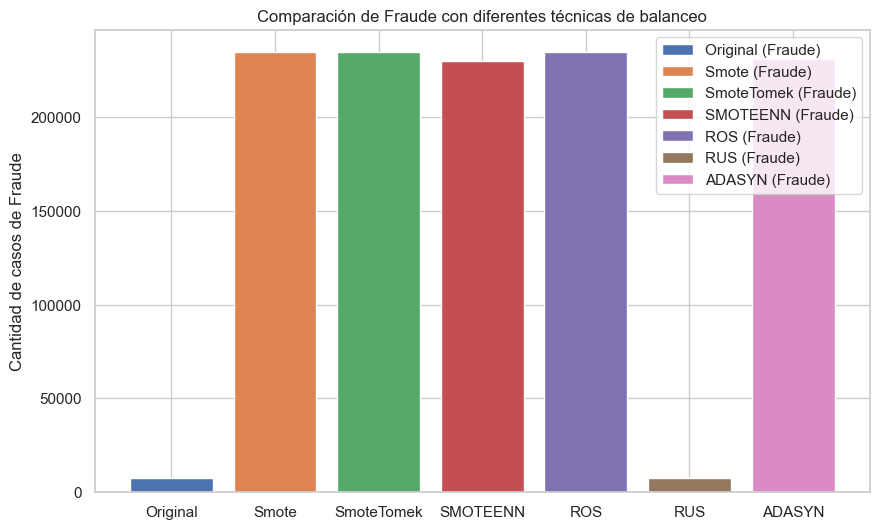

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear DataFrames para cada conjunto de datos
# Asegúrate de haber aplicado previamente SMOTE, SMOTE-Tomek y SMOTE-ENN a tus datos
# Puedes reemplazar los nombres de los DataFrames con los correctos
# Suponiendo que tienes los DataFrames: Modelo_Limpio, Modelo_Limpio_Smote, Modelo_Limpio_SmoteTomek, Modelo_Limpio_SMOTEENN

# Crear un DataFrame para cada conjunto
df_modelo_limpio = pd.DataFrame(data_reduced)
df_modelo_smote = pd.DataFrame(Modelo_Limpio_Smote)
df_modelo_tomek = pd.DataFrame(Modelo_Limpio_SmoteTomek)
df_modelo_smoteenn = pd.DataFrame(Modelo_Limpio_SMOTEENN)
df_modelo_ros = pd.DataFrame(Modelo_Limpio_ROS)
df_modelo_rus = pd.DataFrame(Modelo_Limpio_RUS)
df_modelo_adasyn = pd.DataFrame(Modelo_Limpio_ADASYN)

# Agregar etiquetas de clase (0 para "No Fraude" y 1 para "Fraude")
df_modelo_limpio['Clase'] = data_reduced['fraud']
df_modelo_smote['Clase'] = Modelo_Limpio_Smote['fraud']
df_modelo_tomek['Clase'] = Modelo_Limpio_SmoteTomek['fraud']
df_modelo_smoteenn['Clase'] = Modelo_Limpio_SMOTEENN['fraud']
df_modelo_ros['Clase'] = Modelo_Limpio_ROS['fraud']
df_modelo_rus['Clase'] = Modelo_Limpio_RUS['fraud']
df_modelo_adasyn['Clase'] = Modelo_Limpio_ADASYN['fraud']

# Comparar la distribución de clases en los diferentes conjuntos
distribucion_clases = {
    'Original': df_modelo_limpio['Clase'].value_counts(),
    'Smote': df_modelo_smote['Clase'].value_counts(),
    'SmoteTomek': df_modelo_tomek['Clase'].value_counts(),
    'SMOTEENN': df_modelo_smoteenn['Clase'].value_counts(),
    'ROS': df_modelo_ros['Clase'].value_counts(),
    'RUS': df_modelo_rus['Clase'].value_counts(),
    'ADASYN': df_modelo_adasyn['Clase'].value_counts()
}

# Mostrar la distribución de clases
for conjunto, distribucion in distribucion_clases.items():
    print(f"Distribución de clases en {conjunto}:\n{distribucion}\n")

# Crear una gráfica para visualizar la distribución de clases
plt.figure(figsize=(10, 6))
for conjunto, distribucion in distribucion_clases.items():
    plt.bar([conjunto], [distribucion[1]], label=f"{conjunto} (Fraude)")
plt.ylabel("Cantidad de casos de Fraude")
plt.title("Comparación de Fraude con diferentes técnicas de balanceo")
plt.legend()
plt.show()


# APLICACIÓN DE MACHINE LEARNING

## CASO 1 : SMOTE

### SMOTE - RANDOM FOREST

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separar el conjunto de datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_Smote.drop(columns=['fraud'])  # Variables predictoras
Y = Modelo_Limpio_Smote['fraud']  # Variable objetivo

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Inicializar el modelo de Random Forest
random_forest = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1, bootstrap=False, random_state=42)

# Entrenar el modelo en los datos de entrenamiento
random_forest.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = random_forest.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

# Imprimir métricas de rendimiento
print(f"Precisión (Accuracy): {accuracy}")
print("Matriz de Confusión:")
print(conf_matrix)
print("Reporte de Clasificación:")
print(classification_rep)


Precisión (Accuracy): 0.9838849574021384
Matriz de Confusión:
[[173370   2974]
 [  1002  69380]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    176344
           1       0.96      0.99      0.97     70382

    accuracy                           0.98    246726
   macro avg       0.98      0.98      0.98    246726
weighted avg       0.98      0.98      0.98    246726



### SMOTE - KNN

In [43]:
#KNN ###############
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_Smote.drop(columns=['fraud'])
Y = Modelo_Limpio_Smote['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Elegir el número de vecinos (K) y otros hiperparámetros si es necesario
k_neighbors = 9  # Número de vecinos (ajusta según sea necesario)

# Crear el modelo KNN y entrenarlo
knn = KNeighborsClassifier(n_neighbors=k_neighbors,weights='distance',algorithm='ball_tree')
knn.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = knn.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(Y_test, Y_pred)
print("Precisión (Accuracy):", accuracy)

# Matriz de Confusión
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Reporte de Clasificación
classification_rep = classification_report(Y_test, Y_pred)
print("Reporte de Clasificación:")
print(classification_rep)

Precisión (Accuracy): 0.9796940735877046
Matriz de Confusión:
[[172176   4168]
 [   842  69540]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    176344
           1       0.94      0.99      0.97     70382

    accuracy                           0.98    246726
   macro avg       0.97      0.98      0.98    246726
weighted avg       0.98      0.98      0.98    246726



### SMOTE - XGBOOST

In [59]:
#XGBOOST
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_Smote.drop(columns=['fraud'])
Y = Modelo_Limpio_Smote['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Configurar los hiperparámetros del modelo XGBoost
n_estimators = 100  # Número de árboles en el ensamble (ajusta según sea necesario)
learning_rate = 0.1  # Tasa de aprendizaje (ajusta según sea necesario)
max_depth = 3  # Profundidad máxima de los árboles (ajusta según sea necesario)
min_child_weight = 1  # Mínimo peso de la muestra requerido para crear un nuevo nodo (ajusta según sea necesario)

# Crear y entrenar el modelo XGBoost
xgb = XGBClassifier(subsample=0.6,colsample_bytree=1,n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, min_child_weight=min_child_weight, random_state=42)
xgb.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = xgb.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(Y_test, Y_pred)
print("Precisión (Accuracy):", accuracy)

# Matriz de Confusión
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Reporte de Clasificación
classification_rep = classification_report(Y_test, Y_pred)
print("Reporte de Clasificación:")
print(classification_rep)

Precisión (Accuracy): 0.9777607548454561
Matriz de Confusión:
[[172984   3360]
 [  2127  68255]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98    176344
           1       0.95      0.97      0.96     70382

    accuracy                           0.98    246726
   macro avg       0.97      0.98      0.97    246726
weighted avg       0.98      0.98      0.98    246726



### SMOTE - LIGHTGBM

In [70]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Cargar el DataFrame "Modelo_Limpio"
# Asegúrate de haber aplicado las técnicas de preprocesamiento antes de cargar los datos.
# df = pd.read_csv("ruta/al/archivo.csv")

# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_Smote.drop(columns=['fraud'])
Y = Modelo_Limpio_Smote['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Ajustar el modelo LightGBM con Hiperparámetros Personalizados
params = {
    'max_depth': 10,  # Aumenta el valor según sea necesario
    'num_leaves': 127,
    'learning_rate': 0.1,
    'n_estimators':100  # Prueba con 0.01, 0.05, 0.1, 0.2, 0.3, etc.
      # Establece un valor más alto que 31
    # Otros hiperparámetros de LightGBM
}

clf = lgb.LGBMClassifier(**params)

# Entrenar el Modelo
try:
    clf.fit(X_train, Y_train)
except Exception as e:
    print("Error durante el entrenamiento:", e)

# Realizar predicciones en los datos de prueba
Y_pred = clf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(Y_test, Y_pred)
print("Precisión (Accuracy): {:.2f}%".format(accuracy * 100))

# Matriz de Confusión
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Reporte de Clasificación
classification_rep = classification_report(Y_test, Y_pred)
print("Reporte de Clasificación:")
print(classification_rep)



[LightGBM] [Info] Number of positive: 164595, number of negative: 411099
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005662 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 575694, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.285907 -> initscore=-0.915346
[LightGBM] [Info] Start training from score -0.915346
Precisión (Accuracy): 99.28%
Matriz de Confusión:
[[175252   1092]
 [   686  69696]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    176344
           1       0.98      0.99      0.99     70382

    accuracy                           0.99    246726
   macro avg       0.99      0.99      0.99    246726
weighted avg       0.99      0.99      0.99    246726



### SMOTE - CATBOOST



In [75]:
# Importar las bibliotecas necesarias
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Supongamos que el DataFrame "Modelo_Limpio_Smote" ya está definido y contiene los datos preprocesados

# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_Smote.drop(columns=['fraud'])
Y = Modelo_Limpio_Smote['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Definir el modelo CatBoost con los hiperparámetros seleccionados
catboost_params = {
    'iterations': 500,  # Número de iteraciones
    'depth': 6,         # Profundidad máxima del árbol
    'learning_rate': 0.1,
    'l2_leaf_reg':1,  # Tasa de aprendizaje
    # 'loss_function': 'Logloss',  # Función de pérdida
    'verbose': 100       # Frecuencia de los mensajes de logging
}

clf = CatBoostClassifier(**catboost_params)

# Entrenar el modelo
clf.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = clf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(Y_test, Y_pred)
print("Precisión (Accuracy):", accuracy)

# Matriz de Confusión
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Reporte de Clasificación
classification_rep = classification_report(Y_test, Y_pred)
print("Reporte de Clasificación:")
print(classification_rep)


0:	learn: 0.4853725	total: 91.1ms	remaining: 45.5s
100:	learn: 0.0358572	total: 4.52s	remaining: 17.8s
200:	learn: 0.0281183	total: 9.09s	remaining: 13.5s
300:	learn: 0.0245983	total: 13.8s	remaining: 9.12s
400:	learn: 0.0226160	total: 18.3s	remaining: 4.52s
499:	learn: 0.0209952	total: 22.8s	remaining: 0us
Precisión (Accuracy): 0.992072177233044
Matriz de Confusión:
[[175213   1131]
 [   825  69557]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    176344
           1       0.98      0.99      0.99     70382

    accuracy                           0.99    246726
   macro avg       0.99      0.99      0.99    246726
weighted avg       0.99      0.99      0.99    246726



### SMOTE - SVM

In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_Smote.drop(columns=['fraud'])
Y = Modelo_Limpio_Smote['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Elegir el kernel y otros hiperparámetros si es necesario
kernel = 'linear'  # Puedes seleccionar otros kernels como 'rbf', 'poly', etc.
C = 1.0  # Parámetro de regularización (ajusta según sea necesario)

# Crear el modelo SVM y entrenarlo
svm = SVC(kernel=kernel, C=C)
svm.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = svm.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(Y_test, Y_pred)
print("Precisión (Accuracy):", accuracy)

# Matriz de Confusión
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Reporte de Clasificación
classification_rep = classification_report(Y_test, Y_pred)
print("Reporte de Clasificación:")
print(classification_rep)

In [12]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor

# Escalar las variables
X = Modelo_Limpio_Smote.drop(columns=['fraud'])
Y = Modelo_Limpio_Smote['fraud']

# Crear el modelo SVM
svc = SVC(C=1, kernel='rbf', gamma='auto', probability=True)

# Aplicar validación cruzada con 5 particiones
cv_scores = cross_val_score(svc, X, Y, cv=5)

# Mostrar los resultados de la validación cruzada
print("cv_scores:", cv_scores)
print("mean cv scores:", cv_scores.mean())

## CASO 2: SMOTE-ENN

### SMOTE-ENN - RANDOM FOREST

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separar el conjunto de datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_SMOTEENN.drop(columns=['fraud'])  # Variables predictoras
Y = Modelo_Limpio_SMOTEENN['fraud']  # Variable objetivo

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Inicializar el modelo de Random Forest
random_forest = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_split=2, min_samples_leaf=1, bootstrap=False, random_state=42)

# Entrenar el modelo en los datos de entrenamiento
random_forest.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = random_forest.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

# Imprimir métricas de rendimiento
print(f"Precisión (Accuracy): {accuracy}")
print("Matriz de Confusión:")
print(conf_matrix)
print("Reporte de Clasificación:")
print(classification_rep)


Precisión (Accuracy): 0.9880996421163766
Matriz de Confusión:
[[169386   2039]
 [   824  68332]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    171425
           1       0.97      0.99      0.98     69156

    accuracy                           0.99    240581
   macro avg       0.98      0.99      0.99    240581
weighted avg       0.99      0.99      0.99    240581



### SMOTE-ENN - KNN

In [48]:
#KNN ###############
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_SMOTEENN.drop(columns=['fraud'])
Y = Modelo_Limpio_SMOTEENN['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Elegir el número de vecinos (K) y otros hiperparámetros si es necesario
k_neighbors = 9  # Número de vecinos (ajusta según sea necesario)

# Crear el modelo KNN y entrenarlo
knn = KNeighborsClassifier(n_neighbors=k_neighbors,weights='distance',algorithm='ball_tree')
knn.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = knn.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(Y_test, Y_pred)
print("Precisión (Accuracy):", accuracy)

# Matriz de Confusión
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Reporte de Clasificación
classification_rep = classification_report(Y_test, Y_pred)
print("Reporte de Clasificación:")
print(classification_rep)

Precisión (Accuracy): 0.9931540728486455
Matriz de Confusión:
[[170014   1411]
 [   236  68920]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    171425
           1       0.98      1.00      0.99     69156

    accuracy                           0.99    240581
   macro avg       0.99      0.99      0.99    240581
weighted avg       0.99      0.99      0.99    240581



### SMOTE-ENN - XGBOOST

In [65]:
#XGBOOST
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_SMOTEENN.drop(columns=['fraud'])
Y = Modelo_Limpio_SMOTEENN['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Configurar los hiperparámetros del modelo XGBoost
n_estimators = 300  # Número de árboles en el ensamble (ajusta según sea necesario)
learning_rate = 0.1  # Tasa de aprendizaje (ajusta según sea necesario)
max_depth = 3  # Profundidad máxima de los árboles (ajusta según sea necesario)
min_child_weight = 1  # Mínimo peso de la muestra requerido para crear un nuevo nodo (ajusta según sea necesario)

# Crear y entrenar el modelo XGBoost
xgb = XGBClassifier(subsample=0.6,colsample_bytree=1,n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, min_child_weight=min_child_weight, random_state=42)
xgb.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = xgb.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(Y_test, Y_pred)
print("Precisión (Accuracy):", accuracy)

# Matriz de Confusión
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Reporte de Clasificación
classification_rep = classification_report(Y_test, Y_pred)
print("Reporte de Clasificación:")
print(classification_rep)

Precisión (Accuracy): 0.9883573515780548
Matriz de Confusión:
[[169819   1606]
 [  1195  67961]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    171425
           1       0.98      0.98      0.98     69156

    accuracy                           0.99    240581
   macro avg       0.98      0.99      0.99    240581
weighted avg       0.99      0.99      0.99    240581



### SMOTE-ENN - LIGHTGBM

In [69]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Cargar el DataFrame "Modelo_Limpio"
# Asegúrate de haber aplicado las técnicas de preprocesamiento antes de cargar los datos.
# df = pd.read_csv("ruta/al/archivo.csv")

# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_SMOTEENN.drop(columns=['fraud'])
Y = Modelo_Limpio_SMOTEENN['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Definir el espacio de hiperparámetros para LightGBM
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, -1],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 61, 127]
}

# Inicializar el modelo LightGBM
clf = lgb.LGBMClassifier()

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Entrenar el modelo con GridSearchCV
grid_search.fit(X_train, Y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Realizar predicciones en los datos de prueba usando el mejor modelo
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(Y_test, Y_pred)
print("Precisión (Accuracy): {:.2f}%".format(accuracy * 100))

# Matriz de Confusión
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Reporte de Clasificación
classification_rep = classification_report(Y_test, Y_pred)
print("Reporte de Clasificación:")
print(classification_rep)



Fitting 5 folds for each of 108 candidates, totalling 540 fits
[LightGBM] [Info] Number of positive: 160906, number of negative: 400447
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005295 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 561353, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.286640 -> initscore=-0.911761
[LightGBM] [Info] Start training from score -0.911761
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300, 'num_leaves': 127}
Precisión (Accuracy): 99.59%
Matriz de Confusión:
[[170807    618]
 [   369  68787]]
Reporte de Clasificación:
            

### SMOTE-ENN - CATBOOST

In [76]:
# Importar las bibliotecas necesarias
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Supongamos que el DataFrame "Modelo_Limpio_Smote" ya está definido y contiene los datos preprocesados

# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_SMOTEENN.drop(columns=['fraud'])
Y = Modelo_Limpio_SMOTEENN['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Definir el modelo CatBoost con los hiperparámetros seleccionados
catboost_params = {
    'iterations': 500,  # Número de iteraciones
    'depth': 10,         # Profundidad máxima del árbol
    'learning_rate': 0.1,
    'l2_leaf_reg':3,  # Tasa de aprendizaje
    # 'loss_function': 'Logloss',  # Función de pérdida
    'verbose': 100       # Frecuencia de los mensajes de logging
}

clf = CatBoostClassifier(**catboost_params)

# Entrenar el modelo
clf.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = clf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(Y_test, Y_pred)
print("Precisión (Accuracy):", accuracy)

# Matriz de Confusión
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Reporte de Clasificación
classification_rep = classification_report(Y_test, Y_pred)
print("Reporte de Clasificación:")
print(classification_rep)

0:	learn: 0.4509419	total: 79.6ms	remaining: 39.7s
100:	learn: 0.0188440	total: 7.9s	remaining: 31.2s
200:	learn: 0.0138972	total: 15.5s	remaining: 23s
300:	learn: 0.0110328	total: 23s	remaining: 15.2s
400:	learn: 0.0091670	total: 30.6s	remaining: 7.54s
499:	learn: 0.0077550	total: 38.1s	remaining: 0us
Precisión (Accuracy): 0.9961218882621653
Matriz de Confusión:
[[170884    541]
 [   392  68764]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    171425
           1       0.99      0.99      0.99     69156

    accuracy                           1.00    240581
   macro avg       0.99      1.00      1.00    240581
weighted avg       1.00      1.00      1.00    240581



### SMOTE-ENN - SVM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_Smote.drop(columns=['fraud'])
Y = Modelo_Limpio_Smote['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Elegir el kernel y otros hiperparámetros si es necesario
kernel = 'linear'  # Puedes seleccionar otros kernels como 'rbf', 'poly', etc.
C = 1.0  # Parámetro de regularización (ajusta según sea necesario)

# Crear el modelo SVM y entrenarlo
svm = SVC(kernel=kernel, C=C)
svm.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = svm.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(Y_test, Y_pred)
print("Precisión (Accuracy):", accuracy)

# Matriz de Confusión
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Reporte de Clasificación
classification_rep = classification_report(Y_test, Y_pred)
print("Reporte de Clasificación:")
print(classification_rep)

## CASO 3: SMOTE-Tomek

### SMOTE-TOMEK - RANDOM FOREST

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separar el conjunto de datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_SmoteTomek.drop(columns=['fraud'])  # Variables predictoras
Y = Modelo_Limpio_SmoteTomek['fraud']  # Variable objetivo

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Inicializar el modelo de Random Forest
random_forest = RandomForestClassifier(n_estimators=100, max_depth=30, min_samples_split=2, min_samples_leaf=1, bootstrap=False, random_state=42)


# Entrenar el modelo en los datos de entrenamiento
random_forest.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = random_forest.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

# Imprimir métricas de rendimiento
print(f"Precisión (Accuracy): {accuracy}")
print("Matriz de Confusión:")
print(conf_matrix)
print("Reporte de Clasificación:")
print(classification_rep)



Precisión (Accuracy): 0.9950473362700479
Matriz de Confusión:
[[175277    791]
 [   430  70036]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    176068
           1       0.99      0.99      0.99     70466

    accuracy                           1.00    246534
   macro avg       0.99      0.99      0.99    246534
weighted avg       1.00      1.00      1.00    246534



### SMOTE-TOMEK - KNN

In [47]:
#KNN ###############
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_SmoteTomek.drop(columns=['fraud'])
Y = Modelo_Limpio_SmoteTomek['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Elegir el número de vecinos (K) y otros hiperparámetros si es necesario
k_neighbors = 5  # Número de vecinos (ajusta según sea necesario)

# Crear el modelo KNN y entrenarlo
knn = KNeighborsClassifier(n_neighbors=k_neighbors,weights='distance',algorithm='ball_tree')
knn.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = knn.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(Y_test, Y_pred)
print("Precisión (Accuracy):", accuracy)

# Matriz de Confusión
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Reporte de Clasificación
classification_rep = classification_report(Y_test, Y_pred)
print("Reporte de Clasificación:")
print(classification_rep)

Precisión (Accuracy): 0.9830124850933339
Matriz de Confusión:
[[172451   3617]
 [   571  69895]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    176068
           1       0.95      0.99      0.97     70466

    accuracy                           0.98    246534
   macro avg       0.97      0.99      0.98    246534
weighted avg       0.98      0.98      0.98    246534



### SMOTE-TOMEK - XGBOOST

In [63]:
#XGBOOST
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_SmoteTomek.drop(columns=['fraud'])
Y = Modelo_Limpio_SmoteTomek['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Configurar los hiperparámetros del modelo XGBoost
n_estimators = 300  # Número de árboles en el ensamble (ajusta según sea necesario)
learning_rate = 0.1  # Tasa de aprendizaje (ajusta según sea necesario)
max_depth = 3  # Profundidad máxima de los árboles (ajusta según sea necesario)
min_child_weight = 1  # Mínimo peso de la muestra requerido para crear un nuevo nodo (ajusta según sea necesario)

# Crear y entrenar el modelo XGBoost
xgb = XGBClassifier(subsample=0.6,colsample_bytree=1,n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, min_child_weight=min_child_weight, random_state=42)
xgb.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = xgb.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(Y_test, Y_pred)
print("Precisión (Accuracy):", accuracy)

# Matriz de Confusión
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Reporte de Clasificación
classification_rep = classification_report(Y_test, Y_pred)
print("Reporte de Clasificación:")
print(classification_rep)

Precisión (Accuracy): 0.9850689965684246
Matriz de Confusión:
[[173779   2289]
 [  1392  69074]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    176068
           1       0.97      0.98      0.97     70466

    accuracy                           0.99    246534
   macro avg       0.98      0.98      0.98    246534
weighted avg       0.99      0.99      0.99    246534



### SMOTE-TOMEK - LIGHTGBM

In [72]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Cargar el DataFrame "Modelo_Limpio"
# Asegúrate de haber aplicado las técnicas de preprocesamiento antes de cargar los datos.
# df = pd.read_csv("ruta/al/archivo.csv")

# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_SMOTEENN.drop(columns=['fraud'])
Y = Modelo_Limpio_SMOTEENN['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Ajustar el modelo LightGBM con Hiperparámetros Personalizados
params = {
    'max_depth': 10,  # Aumenta el valor según sea necesario
    'num_leaves': 127,
    'learning_rate': 0.1,
    'n_estimators':100
}

clf = lgb.LGBMClassifier(**params)

# Entrenar el Modelo
try:
    clf.fit(X_train, Y_train)
except Exception as e:
    print("Error durante el entrenamiento:", e)

# Realizar predicciones en los datos de prueba
Y_pred = clf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(Y_test, Y_pred)
print("Precisión (Accuracy): {:.2f}%".format(accuracy * 100))

# Matriz de Confusión
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Reporte de Clasificación
classification_rep = classification_report(Y_test, Y_pred)
print("Reporte de Clasificación:")
print(classification_rep)



[LightGBM] [Info] Number of positive: 160906, number of negative: 400447
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004540 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 561353, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.286640 -> initscore=-0.911761
[LightGBM] [Info] Start training from score -0.911761
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Precisión (Accuracy): 99.48%
Matriz de Confusión:
[[170691    734]
 [   528  68628]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    171425
           1       0.99      0.99      0.99     69156

    accuracy    

### SMOTE-TOMEK - CATBOOST

In [77]:
# Importar las bibliotecas necesarias
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Supongamos que el DataFrame "Modelo_Limpio_Smote" ya está definido y contiene los datos preprocesados

# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_SmoteTomek.drop(columns=['fraud'])
Y = Modelo_Limpio_SmoteTomek['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Definir el modelo CatBoost con los hiperparámetros seleccionados
catboost_params = {
    'iterations': 500,  # Número de iteraciones
    'depth': 4,         # Profundidad máxima del árbol
    'learning_rate': 0.1,
    'l2_leaf_reg':1,  # Tasa de aprendizaje
    # 'loss_function': 'Logloss',  # Función de pérdida
    'verbose': 100       # Frecuencia de los mensajes de logging
}

clf = CatBoostClassifier(**catboost_params)

# Entrenar el modelo
clf.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = clf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(Y_test, Y_pred)
print("Precisión (Accuracy):", accuracy)

# Matriz de Confusión
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Reporte de Clasificación
classification_rep = classification_report(Y_test, Y_pred)
print("Reporte de Clasificación:")
print(classification_rep)

0:	learn: 0.5004440	total: 38.8ms	remaining: 19.4s
100:	learn: 0.0494891	total: 3.97s	remaining: 15.7s
200:	learn: 0.0382516	total: 8.09s	remaining: 12s
300:	learn: 0.0329408	total: 11.9s	remaining: 7.87s
400:	learn: 0.0300349	total: 15.8s	remaining: 3.89s
499:	learn: 0.0273199	total: 19.4s	remaining: 0us
Precisión (Accuracy): 0.9898796920505893
Matriz de Confusión:
[[174706   1362]
 [  1133  69333]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    176068
           1       0.98      0.98      0.98     70466

    accuracy                           0.99    246534
   macro avg       0.99      0.99      0.99    246534
weighted avg       0.99      0.99      0.99    246534



### SMOTE-TOMEK - SVM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_SmoteTomek.drop(columns=['fraud'])
Y = Modelo_Limpio_SmoteTomek['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Elegir el kernel y otros hiperparámetros si es necesario
kernel = 'linear'  # Puedes seleccionar otros kernels como 'rbf', 'poly', etc.
C = 1.0  # Parámetro de regularización (ajusta según sea necesario)

# Crear el modelo SVM y entrenarlo
svm = SVC(kernel=kernel, C=C)
svm.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = svm.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(Y_test, Y_pred)
print("Precisión (Accuracy):", accuracy)

# Matriz de Confusión
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Reporte de Clasificación
classification_rep = classification_report(Y_test, Y_pred)
print("Reporte de Clasificación:")
print(classification_rep)

# APLICACIÓN DE DEEP LEARNING

## Algoritmo LSTM

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar los datos
# Suponiendo que Modelo_Limpio_ROS es tu DataFrame
# Asegúrate de tener las columnas 'customer', 'age', 'gender', 'category', 'amount' y 'fraud'
# X serán las características y y será la variable objetivo
X = Modelo_Limpio_ROS[['customer', 'age', 'gender', 'category', 'amount']]
y = Modelo_Limpio_ROS['fraud']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape de los datos para que sean 3D [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Crear el modelo LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=20000, validation_data=(X_test_reshaped, y_test))

# Guardar el modelo
model.save('lstm_model.h5')
print("Modelo guardado en disco.")

# Evaluar el modelo
_, train_acc = model.evaluate(X_train_reshaped, y_train, verbose=0)
_, test_acc = model.evaluate(X_test_reshaped, y_test, verbose=0)
print('Precisión en entrenamiento: %.3f, Precisión en prueba: %.3f' % (train_acc, test_acc))




Epoch 1/100


c:\Users\Alexander Cruz\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.7056 - loss: 0.6578 - val_accuracy: 0.8502 - val_loss: 0.5926
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8470 - loss: 0.5717 - val_accuracy: 0.8503 - val_loss: 0.5073
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8523 - loss: 0.4879 - val_accuracy: 0.8626 - val_loss: 0.4296
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8657 - loss: 0.4149 - val_accuracy: 0.8786 - val_loss: 0.3685
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8819 - loss: 0.3585 - val_accuracy: 0.8944 - val_loss: 0.3231
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8936 - loss: 0.3179 - val_accuracy: 0.9012 - val_loss: 0.2897
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9011 - loss: 0.2873 - val_accuracy: 0.9067 - val_loss: 0.2651
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9064 - loss: 0.2652 - val_accuracy: 0.9114 - val_l

Modelo guardado en disco.
Precisión en entrenamiento: 0.947, Precisión en prueba: 0.948


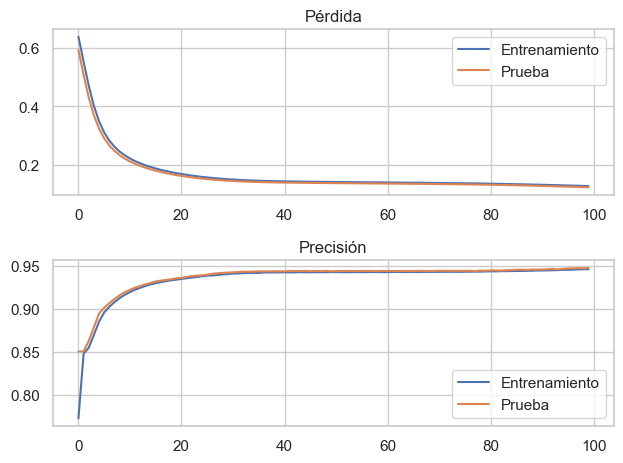

In [ ]:
import matplotlib.pyplot as plt

# Graficar pérdida durante el entrenamiento
plt.subplot(211)
plt.title('Pérdida')
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Prueba')
plt.legend()

# Graficar precisión durante el entrenamiento
plt.subplot(212)
plt.title('Precisión')
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Prueba')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
# Predecir probabilidades para el conjunto de prueba
yhat_probs = model.predict(X_test_reshaped, verbose=0)

# Reducir a un arreglo unidimensional
yhat_probs = yhat_probs[:, 0]



# Precisión: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_probs.round())
print('Precisión: %f' % accuracy)

# Precisión: tp / (tp + fp)
precision = precision_score(y_test, yhat_probs.round())
print('Precisión: %f' % precision)

# Recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_probs.round())
print('Recall: %f' % recall)

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, yhat_probs.round())
print('Matriz de Confusión:')
print(conf_matrix)

Precisión: 0.947687
Precisión: 0.939250
Recall: 0.957188
Matriz de Confusión:
[[165164  10879]
 [  7523 168198]]


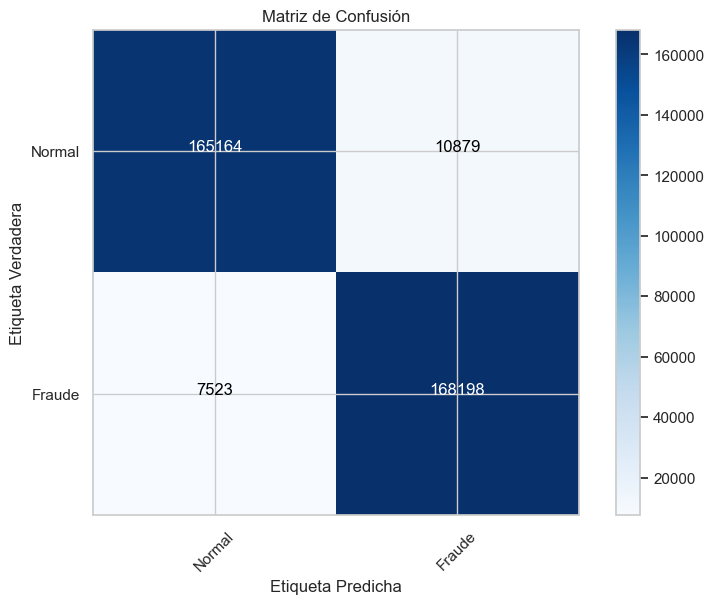

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, yhat_probs.round())

# Definir las etiquetas de las clases
labels = ['Normal', 'Fraude']

# Plotear la matriz de confusión
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
tick_marks = range(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
fmt = 'd'
thresh = conf_matrix.max() / 2.
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, format(conf_matrix[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.show()


## Algoritmo Multilayer Perceptron

In [115]:
ModeloMLP = Modelo_Autoencoders

In [120]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Cargar el DataFrame desde el archivo o usar el DataFrame proporcionado
# Suponiendo que el archivo se llama "ModeloMLP.csv"


# Separar las características (X) y la variable objetivo (y)
X = ModeloMLP.drop("fraud", axis=1)  # Features
y = ModeloMLP["fraud"]  # Target variable

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar el clasificador MLP
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='tanh', learning_rate_init=0.001, momentum=0.99, max_iter=1000, solver="sgd")

# Entrenar el modelo
mlp.fit(X_train, y_train)

# Hacer predicciones en el conjunto de entrenamiento y calcular la precisión
train_predictions = mlp.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Precisión en el conjunto de entrenamiento:", train_accuracy)
print("Matriz de confusión en el conjunto de entrenamiento:")
print(confusion_matrix(y_train, train_predictions))

# Hacer predicciones en el conjunto de prueba y calcular la precisión
test_predictions = mlp.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("\nPrecisión en el conjunto de prueba:", test_accuracy)
print("Matriz de confusión en el conjunto de prueba:")
print(confusion_matrix(y_test, test_predictions))


Precisión en el conjunto de entrenamiento: 0.9877861861861862
Matriz de confusión en el conjunto de entrenamiento:
[[411166      0]
 [  5084      0]]

Precisión en el conjunto de prueba: 0.9881385480371988
Matriz de confusión en el conjunto de prueba:
[[176277      0]
 [  2116      0]]


## Algoritmo Autoencoder

In [101]:
Modelo_Autoencoders

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,1836,4,M,28007,2,28007,1,4.55,0
1,0,1584,2,M,28007,2,28007,1,39.68,0
2,0,3795,4,F,28007,1,28007,1,26.89,0
3,0,1221,3,M,28007,2,28007,1,17.25,0
4,0,2816,5,M,28007,2,28007,1,35.72,0
...,...,...,...,...,...,...,...,...,...,...
594638,179,27,3,F,28007,1,28007,1,20.53,0
594639,179,1211,4,F,28007,1,28007,1,50.73,0
594640,179,1708,2,F,28007,11,28007,11,22.44,0
594641,179,2067,5,M,28007,1,28007,1,14.46,0


In [60]:
# Elimina las comillas simples alrededor de los valores en todas las celdas del DataFrame Modelo_Base
for columna in Modelo_Autoencoders.columns:
    if Modelo_Autoencoders[columna].dtype == 'object':  # Verifica si la columna contiene cadenas
        Modelo_Autoencoders[columna] = Modelo_Autoencoders[columna].str.strip("'")

# Muestra las primeras 10 filas del DataFrame Modelo_Autoencoders después de las operaciones
print(Modelo_Autoencoders.head(10))
# Crear un mapeo de etiquetas a valores numéricos
category_mapping = {
    'es_transportation': 1,
    'es_health': 2,
    'es_otherservices': 3,
    'es_food': 4,
    'es_hotelservices': 5,
    'es_barsandrestaurants': 6,
    'es_tech': 7,
    'es_sportsandtoys': 8,
    'es_wellnessandbeauty': 9,
    'es_hyper': 10,
    'es_fashion': 11,
    'es_home': 12,
    'es_contents': 13,
    'es_travel': 14,
    'es_leisure': 15
}

# Mapear las etiquetas a valores numéricos en la columna 'category'
Modelo_Autoencoders['category'] = Modelo_Autoencoders['category'].map(category_mapping)

# Contar cuántos elementos son 1, 2, 3, ..., 15
conteo_elementos = Modelo_Autoencoders['category'].value_counts()

# Contar cuántos elementos son NaN
conteo_nan = Modelo_Autoencoders['category'].isna().sum()

# Mostrar el conteo para cada elemento y para NaN
print("Conteo de elementos:")
print(conteo_elementos)

print("\nConteo de NaN:")
print(conteo_nan)

   step     customer age gender zipcodeOri     merchant zipMerchant  \
0     0  C1093826151   4      M      28007   M348934600       28007   
1     0   C352968107   2      M      28007   M348934600       28007   
2     0  C2054744914   4      F      28007  M1823072687       28007   
3     0  C1760612790   3      M      28007   M348934600       28007   
4     0   C757503768   5      M      28007   M348934600       28007   
5     0  C1315400589   3      F      28007   M348934600       28007   
6     0   C765155274   1      F      28007   M348934600       28007   
7     0   C202531238   4      F      28007   M348934600       28007   
8     0   C105845174   3      M      28007   M348934600       28007   
9     0    C39858251   5      F      28007   M348934600       28007   

            category  amount  fraud  
0  es_transportation    4.55      0  
1  es_transportation   39.68      0  
2  es_transportation   26.89      0  
3  es_transportation   17.25      0  
4  es_transportation   35.72

In [102]:

Modelo_Autoencoders['gender'] = Modelo_Autoencoders['gender'].replace({'M': 1, 'F': 0, 'E': 2, 'U': 3})
print(Modelo_Autoencoders.head(10))

   step  customer  age  gender zipcodeOri  merchant zipMerchant  category  \
0     0      1836    4       1      28007         2       28007         1   
1     0      1584    2       1      28007         2       28007         1   
2     0      3795    4       0      28007         1       28007         1   
3     0      1221    3       1      28007         2       28007         1   
4     0      2816    5       1      28007         2       28007         1   
5     0       677    3       0      28007         2       28007         1   
6     0       552    1       0      28007         2       28007         1   
7     0      1038    4       0      28007         2       28007         1   
8     0      3410    3       1      28007         2       28007         1   
9     0      2754    5       0      28007         2       28007         1   

   amount  fraud  
0    4.55      0  
1   39.68      0  
2   26.89      0  
3   17.25      0  
4   35.72      0  
5   25.81      0  
6    9.10      0  


In [65]:
import pandas as pd

# Supongamos que 'Modelo_Base' es tu DataFrame que contiene los datos
# Calculamos el conteo de ocurrencias de cada cliente en la columna 'customer'
conteo_clientes = Modelo_Autoencoders['customer'].value_counts()

# Creamos un diccionario para mapear cada cliente con su frecuencia de ocurrencia
mapeo_ord = {cliente: i+1 for i, cliente in enumerate(conteo_clientes.index)}

# Aplicamos la transformación ordinal a la columna 'customer'
Modelo_Autoencoders ['customer'] = Modelo_Autoencoders['customer'].map(mapeo_ord)

# Mostramos el resultado
print(Modelo_Autoencoders['customer'])

0         1836
1         1584
2         3795
3         1221
4         2816
          ... 
594638      27
594639    1211
594640    1708
594641    2067
594642    3222
Name: customer, Length: 594643, dtype: int64


In [66]:
import pandas as pd

# Supongamos que 'Modelo_Base' es tu DataFrame que contiene los datos
# Calculamos el conteo de ocurrencias de cada comerciante en la columna 'merchant'
conteo_comerciantes = Modelo_Autoencoders['merchant'].value_counts()

# Creamos un diccionario para mapear cada comerciante con su frecuencia de ocurrencia
mapeo_ord_merchant = {comerciante: i+1 for i, comerciante in enumerate(conteo_comerciantes.index)}

# Aplicamos la transformación ordinal a la columna 'merchant'
Modelo_Autoencoders['merchant'] = Modelo_Autoencoders['merchant'].map(mapeo_ord_merchant)

# Mostramos el resultado
print(Modelo_Autoencoders['merchant'])

0          2
1          2
2          1
3          2
4          2
          ..
594638     1
594639     1
594640    11
594641     1
594642     1
Name: merchant, Length: 594643, dtype: int64


In [103]:

# Convertir las columnas a tipo de dato entero
Modelo_Autoencoders['age'] = Modelo_Autoencoders['age'].astype(int)
Modelo_Autoencoders['category'] = Modelo_Autoencoders['category'].astype(int)
Modelo_Autoencoders['amount'] = Modelo_Autoencoders['amount'].astype(float)
Modelo_Autoencoders['gender'] = Modelo_Autoencoders['gender'].astype(int)

# Validar los tipos de datos de las columnas
tipos_de_datos = Modelo_Autoencoders[['age', 'category', 'amount', 'gender']].dtypes

# Mostrar los tipos de datos
print(tipos_de_datos)

age           int32
category      int32
amount      float64
gender        int32
dtype: object


In [92]:
Modelo_Autoencoders['age'] = Modelo_Autoencoders['age'].replace('U', 3)
count_U = (Modelo_Autoencoders['age'] == 'M').sum()
print("Cantidad de valores 'M' en la columna 'age':", count_U)

Cantidad de valores 'M' en la columna 'age': 0


Epoch 1/100
3717/3717 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.5189 - val_loss: 0.4589
Epoch 2/100
3717/3717 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.4601 - val_loss: 0.4575
Epoch 3/100
3717/3717 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.4708 - val_loss: 0.4561
Epoch 4/100
3717/3717 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.4692 - val_loss: 0.4559
Epoch 5/100
3717/3717 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.4628 - val_loss: 0.4559
Epoch 6/100
3717/3717 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.4509 - val_loss: 0.4558
Epoch 7/100
3717/3717 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.4543 - val_loss: 0.4558
Epoch 8/100
3717/3717 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.4638 - val_loss: 0.4558
Epoch 9/100
3717/3717 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.4577 - val_loss: 0.4558
Epoch 10/100
3717/3717 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.4530 - val_loss: 0.4557
Epoch 11/100
3717/3717 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.4523 - val_loss: 0.4557
Epoch 12/100
3717/3

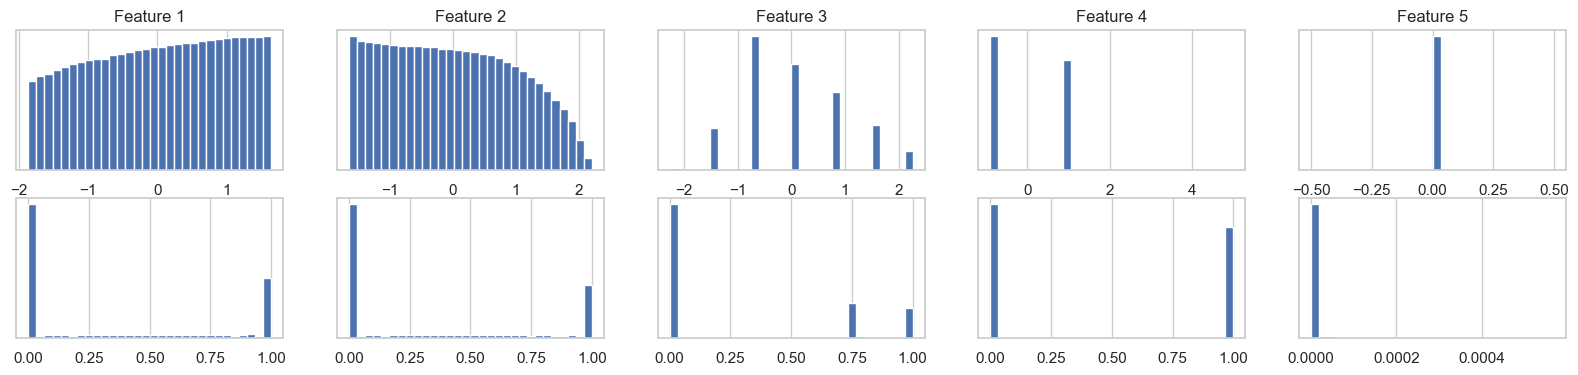

In [107]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Preprocesamiento de datos
X = Modelo_Autoencoders.drop(columns=["fraud"])  # Variables predictoras
y = Modelo_Autoencoders["fraud"]  # Variable objetivo

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Definir el autoencoder
class Autoencoder(tf.keras.Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim   
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(latent_dim, activation='relu')
        ])
        self.decoder = tf.keras.Sequential([
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(X.shape[1], activation='sigmoid')
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Entrenar el autoencoder
latent_dim = 5  # Número de características comprimidas
autoencoder = Autoencoder(latent_dim)
autoencoder.compile(optimizer='adam', loss='mse')  # Usamos 'mse' (error cuadrático medio) como función de pérdida
autoencoder.fit(X_train, X_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(X_test, X_test))

# Obtener las representaciones comprimidas (features) para los datos de entrenamiento
encoded_data_train = autoencoder.encoder(X_train).numpy()
encoded_data_test = autoencoder.encoder(X_test).numpy()

# Guardar el modelo para su uso posterior
autoencoder.save("Modelo_Autoencoders.h5")

# Visualizar algunas características originales y reconstruidas
decoded_data_train = autoencoder.decoder(encoded_data_train).numpy()
decoded_data_test = autoencoder.decoder(encoded_data_test).numpy()

n = 5  # Número de características a visualizar
plt.figure(figsize=(20, 4))
for i in range(n):
    # Característica original
    ax = plt.subplot(2, n, i + 1)
    plt.hist(X_train[:, i], bins=30)
    plt.title(f'Feature {i+1}')
    ax.get_yaxis().set_visible(False)

    # Característica reconstruida
    ax = plt.subplot(2, n, i + 1 + n)
    plt.hist(decoded_data_train[:, i], bins=30)
    ax.get_yaxis().set_visible(False)
plt.show()


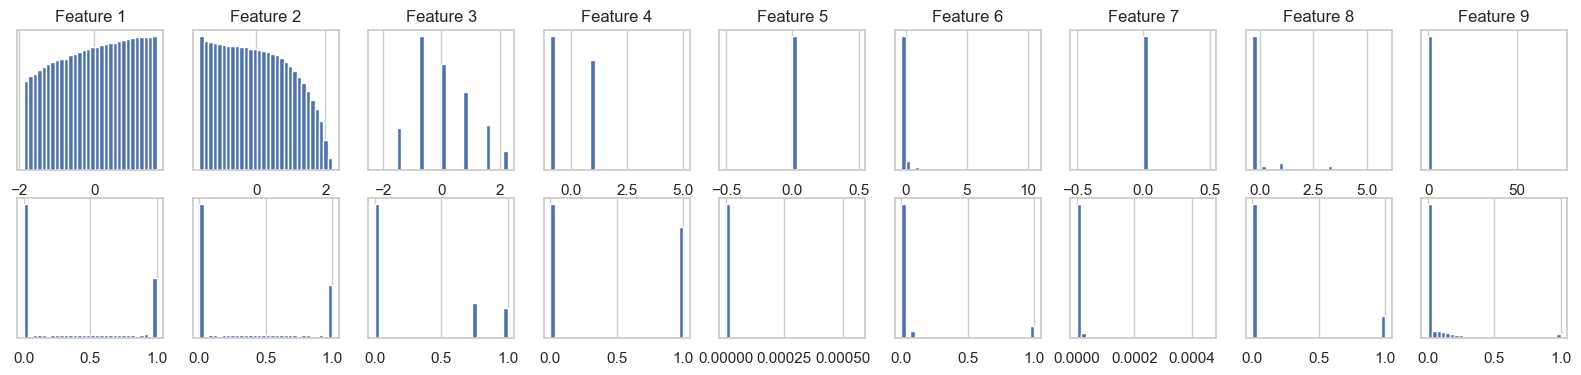

In [108]:
# Visualizar algunas características originales y reconstruidas
decoded_data_train = autoencoder.decoder(encoded_data_train).numpy()
decoded_data_test = autoencoder.decoder(encoded_data_test).numpy()

n = 9  # Número de características a visualizar
plt.figure(figsize=(20, 4))
for i in range(n):
    # Característica original
    ax = plt.subplot(2, n, i + 1)
    plt.hist(X_train[:, i], bins=30)
    plt.title(f'Feature {i+1}')
    ax.get_yaxis().set_visible(False)

    # Característica reconstruida
    ax = plt.subplot(2, n, i + 1 + n)
    plt.hist(decoded_data_train[:, i], bins=30)
    ax.get_yaxis().set_visible(False)
plt.show()

In [106]:
# Obtener los pesos de la capa de codificación
encoder_weights = autoencoder.encoder.get_weights()[0]

# Calcular la importancia de cada variable
feature_importance = np.abs(encoder_weights).mean(axis=1)

# Obtener los nombres de las variables
feature_names = X.columns

# Ordenar las variables por importancia
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_feature_importance = feature_importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Imprimir las variables seleccionadas y su importancia
print("Variables seleccionadas y su importancia:")
for name, importance in zip(sorted_feature_names, sorted_feature_importance):
    print(f"{name}: {importance}")

# Guardar los nombres de las variables seleccionadas y su importancia en un archivo
selected_features_df = pd.DataFrame({'Variable': sorted_feature_names, 'Importancia': sorted_feature_importance})
selected_features_df.to_csv('Variables_seleccionadas.csv', index=False)


Variables seleccionadas y su importancia:
gender: 0.3033559024333954
amount: 0.23989298939704895
merchant: 0.1894574761390686
category: 0.17049263417720795
customer: 0.13559016585350037
age: 0.10751772671937943
step: 0.10738390684127808
zipcodeOri: 0.10622209310531616
zipMerchant: 0.10315817594528198


In [109]:
# Obtener los pesos de la capa de codificación
encoder_weights = autoencoder.encoder.get_weights()[0]

# Calcular la importancia de cada variable
feature_importance = np.abs(encoder_weights).mean(axis=1)

# Obtener los nombres de las variables
feature_names = X.columns

# Ordenar las variables por importancia
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_feature_importance = feature_importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Imprimir las variables seleccionadas y su importancia
print("Variables seleccionadas y su importancia:")
for name, importance in zip(sorted_feature_names, sorted_feature_importance):
    print(f"{name}: {importance}")

# Guardar los nombres de las variables seleccionadas y su importancia en un archivo
selected_features_df = pd.DataFrame({'Variable': sorted_feature_names, 'Importancia': sorted_feature_importance})
selected_features_df.to_csv('Variables_seleccionadas.csv', index=False)


Variables seleccionadas y su importancia:
amount: 0.3245360255241394
gender: 0.2735152542591095
category: 0.24732062220573425
step: 0.16668030619621277
merchant: 0.14956995844841003
zipcodeOri: 0.10850543528795242
customer: 0.10820577293634415
age: 0.10232841968536377
zipMerchant: 0.10046425461769104


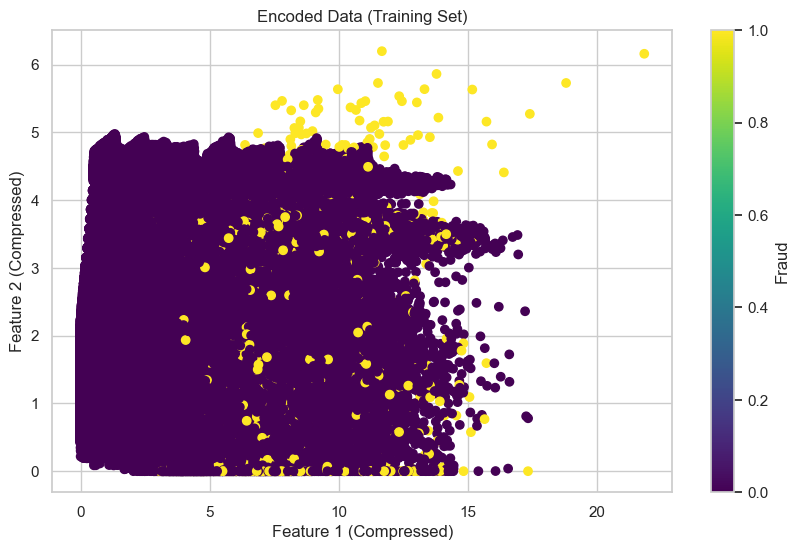

In [110]:
# Obtener las características comprimidas para los datos de entrenamiento y prueba
encoded_data_train = autoencoder.encoder(X_train).numpy()
encoded_data_test = autoencoder.encoder(X_test).numpy()

# Visualizar las características codificadas
plt.figure(figsize=(10, 6))
plt.scatter(encoded_data_train[:, 0], encoded_data_train[:, 1], c=y_train, cmap='viridis')
plt.colorbar(label='Fraud')
plt.xlabel('Feature 1 (Compressed)')
plt.ylabel('Feature 2 (Compressed)')
plt.title('Encoded Data (Training Set)')
plt.grid(True)
plt.show()


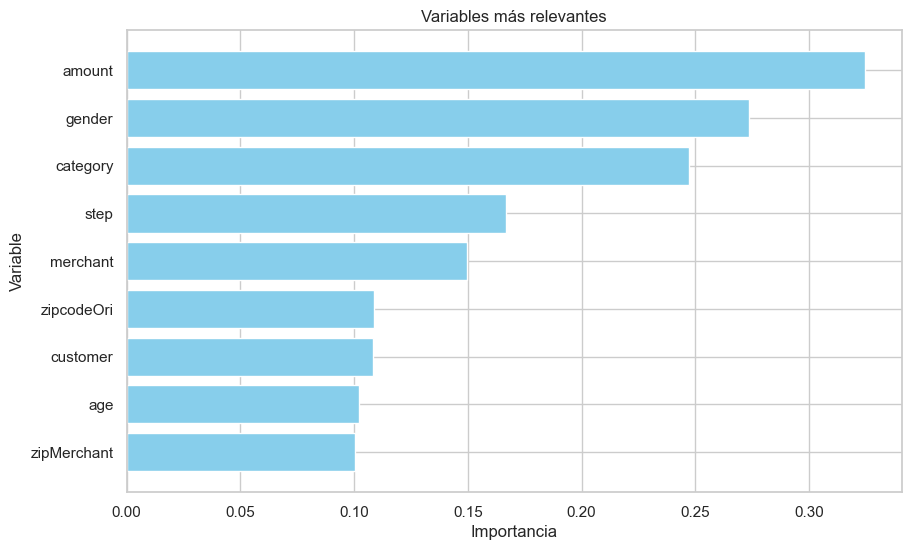

In [111]:
import matplotlib.pyplot as plt

# Graficar las variables más relevantes
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_feature_importance, color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.title('Variables más relevantes')
plt.gca().invert_yaxis()  # Invertir el eje y para que las variables más importantes estén arriba
plt.show()

Epoch 1/100
3717/3717 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.4610 - val_loss: 0.4556
Epoch 2/100
3717/3717 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.4586 - val_loss: 0.4556
Epoch 3/100
3717/3717 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.4616 - val_loss: 0.4556
Epoch 4/100
3717/3717 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.4543 - val_loss: 0.4556
Epoch 5/100
3717/3717 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.4545 - val_loss: 0.4556
Epoch 6/100
3717/3717 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.4435 - val_loss: 0.4556
Epoch 7/100
3717/3717 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.4602 - val_loss: 0.4556
Epoch 8/100
3717/3717 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.4612 - val_loss: 0.4556
Epoch 9/100
3717/3717 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.4569 - val_loss: 0.4556
Epoch 10/100
3717/3717 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.4621 - val_loss: 0.4556
Epoch 11/100
3717/3717 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.4583 - val_loss: 0.4556
Epoch 12/100
3717/3

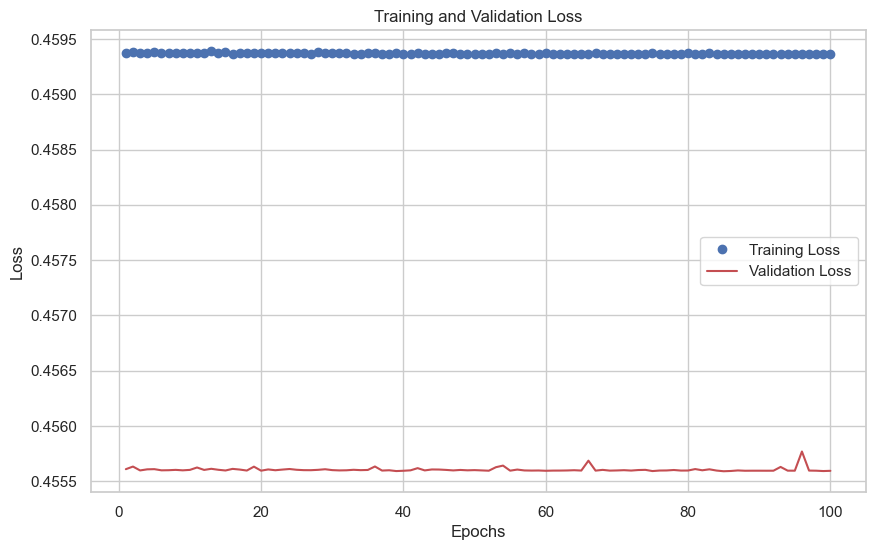

In [112]:
history = autoencoder.fit(X_train, X_train,
                           epochs=100,
                           batch_size=128,
                           shuffle=True,
                           validation_data=(X_test, X_test))

# Obtener la historia de la pérdida durante el entrenamiento
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Crear la gráfica de la función de pérdida
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
